<div style="background-color: lightgrey; padding: 20px; border-radius: 30px; color: green;">
    <h1 align = "center" > <u>INF4127: TECHNIQUES D'OPTIMISATION </u></h1>
</div>

<h1 style="text-align: center;"><u>IMPLEMENTATION DES DIFFERENTES VARIANTES DE L'ALGORITHME D'OPTIMISATION DE LA DESCENTE DE GRADIENT EN PYTHON</u></h1>

<div style="text-align: left; background-color: lightgrey; font-size: 20px; display: inline-block;">
    <p><u>Examinateur: Dr MELATAGIA</u></p>
</div>

<h1 style="text-align: left;"><u> PARTICIPANT: </u></h1>
    
</div><table style="background-color: lightgrey;">
    <thead>
        <tr>
            <th>Noms</th>
            <th>Prénoms</th>
            <th>Matricule</th>
        </tr>
    </thead>
    <tbody bgcolor='green' align='center'>
        <tr>
            <td>NOUBISSI FOPA</td>
            <td>CHRISTIAN JUNIOR</td>
            <td>19M2315</td>
        </tr>
        <tr>
            <td>ESSUTHI MBANGUE</td>
            <td>ANGE ARMEL</td>
            <td>0000</td>
        </tr>
        <tr>
            <td>MBELLE BONO</td>
            <td>AURELIEN</td>
            <td>0000</td>
        </tr>
    </tbody>
</table>

# 1-) IMPORTATION DES BIBLIOTHEQUES NECESSAIRES

In [1]:
# Pour le Tracage 3D avec Matplotlib
from mpl_toolkits.mplot3d import Axes3D
# Pour Tracage des fonctions
import matplotlib.pyplot as plt
# Pour Gestion des cartes de couleurs
from matplotlib import cm
# Pour la Gestion des couleurs
import matplotlib.colors
# Pour la gestion des animations
from matplotlib import animation, rc
# Pour la gestion des pages HTML
from IPython.display import HTML
# Pour la gestion des tableaux et des matrices
import numpy as np


# <u>2-) IMPLEMENTATION DU NEURONE SIGMOIDE DANS LA CLASSE SN</u>

**Le neurone Sigmoide est un neurone qui applique la fonction sigmoïde à sa sortie. Ainsi, pour chaque entrée, il associe un poids et retourne une probabilité comprise entre 0 et 1.**
**L'objectif est de determiner les meilleures valeurs possibles pour le poids w et le biais b**

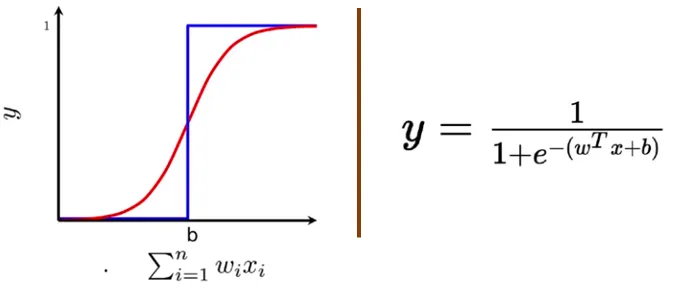


In [3]:
class SN:
    
    #constructor
    def __init__(self, w_init, b_init, algo):
        self.w = w_init
        self.b = b_init
        self.w_h = []
        self.b_h = []
        self.e_h = []
        self.algo = algo
        
    #logistic function  
    def sigmoid(self, x, w=None, b=None):
        if w is None:
            w = self.w
        if b is None:
            b = self.b
        return 1. / (1. + np.exp(-(w*x + b)))
    
    #loss function
    def error(self, X, Y, w=None, b=None):
        if w is None:
            w = self.w
        if b is None:
            b = self.b
        err = 0
        for x, y in zip(X, Y):
            err += 0.5 * (self.sigmoid(x, w, b) - y) ** 2
        return err
   
    #Gradient of weigth
    def grad_w(self, x, y, w=None, b=None):
        if w is None:
            w = self.w
        if b is None:
            b = self.b
        y_pred = self.sigmoid(x, w, b)
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    #Gradient of bias
    def grad_b(self, x, y, w=None, b=None):
        if w is None:
            w = self.w
        if b is None:
            b = self.b
        y_pred = self.sigmoid(x, w, b)
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    #Fit method
    def fit(self, X, Y, epochs=100, eta=0.01, gamma=0.9, mini_batch_size=100, eps=1e-8,  beta=0.9, beta1=0.9, beta2=0.9):
        self.w_h = []
        self.b_h = []
        self.e_h = []
        self.X = X
        self.Y = Y
    
        if self.algo == 'GD':
            for i in range(epochs):
                dw, db = 0, 0
                for x, y in zip(X, Y):
                    dw += self.grad_w(x, y)
                    db += self.grad_b(x, y)
                self.w -= eta * dw / X.shape[0]
                self.b -= eta * db / X.shape[0]
                self.append_log()
        
        elif self.algo == 'MiniBatch':
            for i in range(epochs):
                dw, db = 0, 0
                points_seen = 0
                for x, y in zip(X, Y):
                    dw += self.grad_w(x, y)
                    db += self.grad_b(x, y)
                    points_seen += 1
                    if points_seen % mini_batch_size == 0:
                        self.w -= eta * dw / mini_batch_size
                        self.b -= eta * db / mini_batch_size
                        self.append_log()
                        dw, db = 0, 0
        
        elif self.algo == 'Momentum':
            v_w, v_b = 0, 0
            for i in range(epochs):
                dw, db = 0, 0
                for x, y in zip(X, Y):
                    dw += self.grad_w(x, y)
                    db += self.grad_b(x, y)
                v_w = gamma * v_w + eta * dw 
                v_b = gamma * v_b + eta * db
                self.w = self.w - v_w
                self.b = self.b - v_b
                self.append_log()
        
        elif self.algo == 'NAG':
            v_w, v_b = 0, 0
            for i in range(epochs):
                dw, db = 0, 0
                v_w = gamma * v_w
                v_b = gamma * v_b
                for x, y in zip(X, Y):
                    dw += self.grad_w(x, y, self.w - v_w, self.b - v_b)
                    db += self.grad_b(x, y, self.w - v_w, self.b - v_b)
                v_w = v_w + eta * dw
                v_b = v_b + eta * db
                self.w = self.w - v_w
                self.b = self.b - v_b
                self.append_log()

        elif self.algo =="Adagrad":
            v_w, v_b = 0, 0  
            for i in range(epochs):
                dw, db = 0, 0
                for x, y in zip(X, Y):
                    dw += self.grad_w(x, y)
                    db += self.grad_b(x, y)
                v_w += dw**2
                v_b += db**2
                self.w -= eta / np.sqrt(v_w + eps) * dw
                self.b -= eta / np.sqrt(v_b + eps) * db
                self.append_log()

        elif self.algo == "RMSprop":
            v_w, v_b = 0, 0
            for i in range(epochs):
                dw, db = 0, 0
                for x, y in zip(X, Y):
                    dw += self.grad_w(x, y)
                    db += self.grad_b(x, y)
                v_w = beta * v_w + (1 - beta) * dw**2
                v_b = beta * v_b + (1 - beta) * db**2
                self.w -= (eta / np.sqrt(v_w) + eps) * dw
                self.b -= (eta / np.sqrt(v_b) + eps) * db
                self.append_log()

        elif self.algo == "Adam":
            beta1=0.9
            beta2=0.9
            v_w, v_b = 0, 0
            m_w, m_b = 0, 0
            num_updates = 0
            for i in range(epochs):
                dw, db = 0, 0
                for x, y in zip(X, Y):
                    dw = sn.grad_w(x, y)
                    db = sn.grad_b(x, y)
                    num_updates += 1
                    m_w = beta1 * m_w + (1-beta1) * dw
                    m_b = beta1 * m_b + (1-beta1) * db
                    v_w = beta2 * v_w + (1-beta2) * dw**2
                    v_b = beta2 * v_b + (1-beta2) * db**2
                    m_w_c = m_w / (1 - np.power(beta1, num_updates))
                    m_b_c = m_b / (1 - np.power(beta1, num_updates))
                    v_w_c = v_w / (1 - np.power(beta2, num_updates))
                    v_b_c = v_b / (1 - np.power(beta2, num_updates))
                    sn.w -= (eta / np.sqrt(v_w_c) + eps) * m_w_c
                    sn.b -= (eta / np.sqrt(v_b_c) + eps) * m_b_c
                    sn.append_log()
        
    #logging      
    def append_log(self):
        self.w_h.append(self.w)
        self.b_h.append(self.b)
        self.e_h.append(self.error(self.X, self.Y))


### <u>1- La classe SN </u>

C'est la classe principale de notre **neurone Sigmoide** a l'interieur duquel sera appliquée les algorithmes de descente de gradient les methodes et le constructeur init.
### <u>2- La fonction init</u>

C' est le constructeur de notre classe SN. Elle permet d'initialiser les parametres(poids et biais) de notre neurone sigmoide. Ces arguments d'entrées sont:
- **w_init**, **b_init** qui sont initialisés avec des valeurs spécifiques pour comprendre le fonctionnement de l'algorithme en fonction de different parametres initiaux. On prefere les initialiser ainsi plutot que de maniere aléatoire pour eviter de rester bloquer dans les minima locaux.
- **algo** indique la variante d'algorithme de descente de gradient qui sera utilisé pour ltrouver les parametres optimaux. C'est egalement a cette etape que l'on reccupere les historiques des parametres et de l'erreur que nous stockons dans les listes **w_h**, **b_h** et **e_h**.
### <u>3- La fonction Sigmoid</u>

C'est la fonction principale de la classe SN sur laquelle sera appliqué nos differents algorithmes de descente de gradient. Elle defini la fonction sigmoide de la ligne suivante et prends en entrée x et 2 parametres optionels (w et b) . $$ \sigma(x) = \frac{1}{1 - e^{-(wx + b)}} $$
Si w et b sont specifié dans Sigmoid l'algoritme prendra en compte ces valeurs sinon elle prendra en compte les valeurs apprises par le constructeur pour calculer la fonction.

### <u>4- La fonction error</u>

Elle sera la fonction de perte utilisée pour notre algorithme. Il s'agit dans ce cas de la motie la mean square error (mse) qui est calculé a chaque iterations a travers chaque point de données et est defini comme suite $$ \frac{1}{2} ( \hat{y} - y )^2 $$ ou $$ \hat{y} $$ represente la valeur obtenu par la sigmoide a une etape et y represente la valeur reelle. Dans ce cas nous avons pris la moitié de la mse comme metrique parceque sa derive est plus manipulable. La fonction error prend en entrée X et Y comme argument s obligatoirs et des parametrees facultatifs
 
### <u>5- Les gradients du poids w et du biais b</u>

Ils sont respectivement defini par : $$ grad_w = ( \hat{y} - y ) \cdot \hat{y} \cdot ( 1 - \hat{y} ) \cdot x $$
et  $$ grad_b = ( \hat{y} - y ) \cdot \hat{y} \cdot ( 1 - \hat{y} ) $$

### <u>6- La methode fit</u>

Elle permet de parcourir simultanneement les tableaux X et Y pour entrainer le modele sur les donnees X et Y en tenant compte de plusieurs parametres. Pour cela elle stocke apres chaque iterations les valeurs du poids, du biais et de l'erreur dans des tableaux. Ensuite elle assigne les donnees d'entrée X et les cibles Y aux variable du constructeur de la classe **SN**

### <u>7- Choix de l'algorithme de descente de gradient</u>

Par la suite nous choisissons l'algorithme de descente de gradient a appliquer et nous l'appliquons a la méthode fit. Nous avons ajouté les algorithmes qui n'ont pas été évoqué dans la classe SN notament **Adagrad**, **RMSprop** et **Adam**

### <u>8- La fonction append_log</u>

Cette fonction permet de stocker les valeurs de nos parametres (poids et biais) et de l'erreur a chaque iterations et pour chaque variables.


# <u>3- Configuration du traçage</u>

Le but de cette section est d'utiliser quelques parametres pour simuler la descente du gradient sur un jeu de donnees 2D et de creer les visualisations et des animations pour les resultats dans des graphiques et des representations 2D et 3D.

Nous definissons ainsi:
- Les donnees: l'entrée **X** et la cible **Y** dans un tableau
- L'algorithme de descente de gradient utilisé **GD** le poids initial **w_init** et le biais initial **b_init**
- Les valeurs minima et maxima de du poids et du biais
- Les parametres tels que :
    - le nombre d'epoques **epochs = 200**
    - la taille du mini lot **mini_batch_size = 6**
    - le facteur de momentum qui influence le poids accordé au gradient precedent **gamma = 0.9**
    - le taux d'apprentissage **eta = 5**
- Le nombre de frames pour l'animation
- Le type d'animation a afficher en fonction de la dimension

## <u>3-1- La Variation des parametres et de la fonction de perte avec les differents algorithmes</u>


In [5]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'GD'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


Pour la visualisation des gravites en 2D, on initialise deux tableaux X et Y pour les données et les cibles. Ensuite on choisi l'algorithme de descente qui sera utilisé. Respectivement **GD**, **Momentum**, **MiniBatch** et **NAG** pour les 4 graphiques suivants. Ensuite on defini les limites du **poids** du **biais** et des autres parametres tels que le nombre d'epoques, la taille des mini lot, gamma et eta. Enfin on choisi le nombre de frames par animation et on defini la dimension du graphique a afficher (2D dans ce cas). 

Par la suite, on va entrainer SN sur nos données et on va afficher le graphique pour nos differents algorithmes.

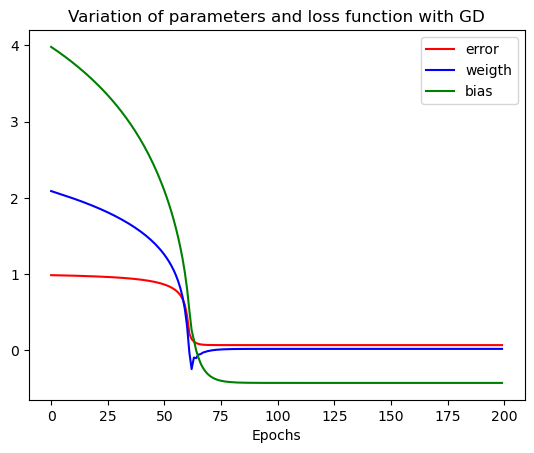

In [7]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with GD")
plt.xlabel("Epochs")
plt.show()


### <u>3-1-1- La Variation des parametres et de la fonction de perte avec GD</u>

On constate ici avec GD que:

- la **perte** quitte de 1 a 0 en 60 iterations avant de se stabiliser

- le **poids** quand a lui quitte de 2.1 tombe a -0,2 en un peu moins de 60 iterations avant de se stabiliser autour de la 70 eme iterations

- le **biais** chute de 4 a -0,5 apres plus de 75 iterations avant de se stabiliser.


In [9]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'Momentum'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


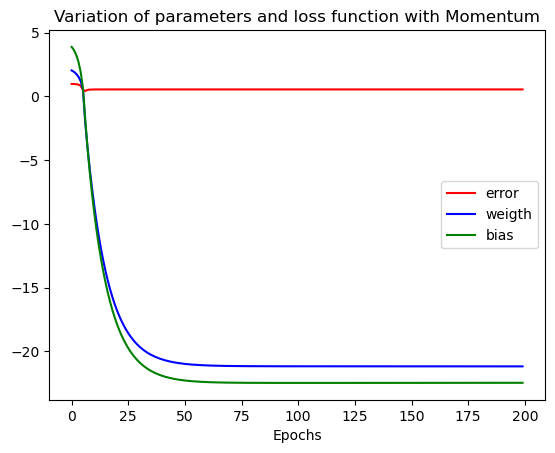

In [11]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Momentum")
plt.xlabel("Epochs")
plt.show()


### <u>3-1-2- La Variation des parametres et de la fonction de perte avec Momentum</u>

Avec Momentum, on constate que les parametres et la perte se stabilise rapidement:

- L'**erreur** se stabilise assez rapidement (apres 20 iterations ) et varie tres peux (de l'ordre de 1e-1)
- Le **poids** varie beaucoup de 2,1 a -20 mais atteint la convergence a 40 iterations
- Le **biais** varie aussi tres beaucoup quittant de 4 a -25 en 40 iterations puis reste fixe.

In [13]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'MiniBatch'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


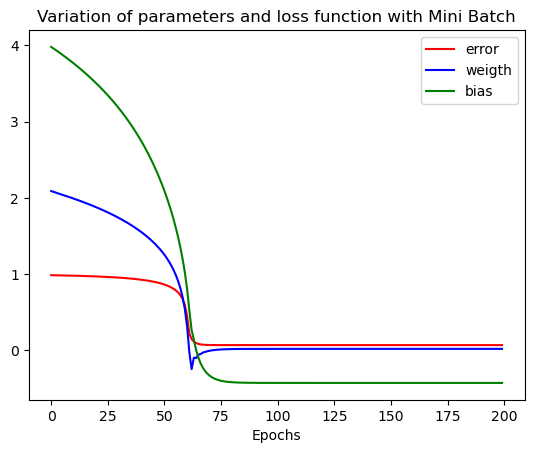

In [15]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Mini Batch")
plt.xlabel("Epochs")
plt.show()


### <u>3-1-3- La Variation des parametres et de la fonction de perte avec Mini-Batch</u>

Avec Mini batch:
- La convergence de la **perte** est atteinte apres 60 iterations avec une variation de 1 a ~ 0. Ce passage se fait en quelques iterations seuleument
- Le **poids** passe de 2,1 a -0,5 en 60 itérations puis atteint se stabilise a 0 aprtir de la 75 eme iteration
- Le **biais** attent la convergence en 75 iterations en passant de 4 a -0,6.

In [17]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'NAG'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


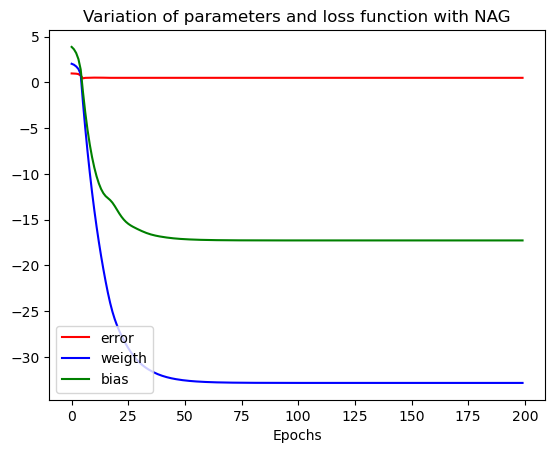

In [19]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with NAG")
plt.xlabel("Epochs")
plt.show()


### <u>3-1-4- La Variation des parametres et de la fonction de perte avec NAG</u>

Avec la variante NAG on constate que:
- L'erreur varie tres peu de 0,1 a ~0.0 en une dizaine d'iteration.
- Le poids varie fortement (2.1 a -40) et se stabilise rapidement (au bout de 30 iterations).
- Le biais se stabilise aussi rapidement et varie fortement (de 4 a -15) comme le poids.

In [21]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'Adagrad'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


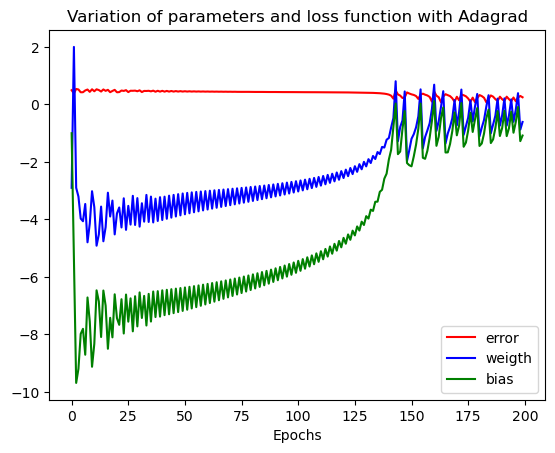

In [23]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Adagrad")
plt.xlabel("Epochs")
plt.show()


### <u>3-1-5- La Variation des parametres et de la fonction de perte avec Adagrad</u>

Avec la variante Adagrad, on constate que:
- Les parametres varient presque a toutes les itérations. En effet, ceci s'eplique par le fait que Adagrad met a jour les parametres de la fonction apres chaques étapes et ces paremetres sont defini de facon individuelle pour chaque étape.
- La perte quand a elle est tres faible durant tout le processus. Elle oscille légerement jusqu'a la 50ieme semble se stabiliser entre la 50 ieme et la 130 ieme ensuite oscille de nouveux apres la jusqu'a la fin. Ceci s'explique par le fait que la perte oscille beaucoup dans les zone ou les parametres oscillent beaucoup.

In [25]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'RMSprop'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


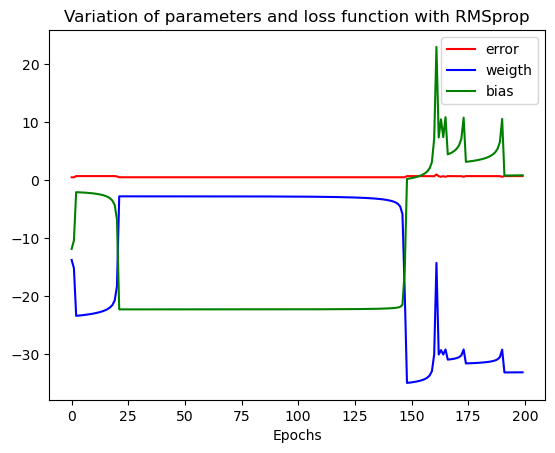

In [27]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with RMSprop")
plt.xlabel("Epochs")
plt.show()


### <u>3-1-6- La Variation des parametres et de la fonction de perte avec RMSprop</u>

Avec la RMSprop, on constate que:
- Les parametres n'ont aucune convergence et semble decrire des mouvement irrégulier
- L'erreur quand a elle reste constante a presque 0 durant tout le processus. Dans Ce cas la RMSprop est vraiment ideal pour determiner la perte car dés la premiere iteration, on a une perte minimale.

In [29]:
#Data
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
#Algo and parameter values
algo = 'Adam'
w_init = 2.1
b_init = 4.0
#parameter min and max values- to plot update rule
w_min = -7
w_max = 5
b_min = -7
b_max = 5
#learning algorithum options
epochs = 200
mini_batch_size = 6
gamma = 0.9
eta = 5
#animation number of frames
animation_frames = 20
#plotting options
plot_2d = True
plot_3d = False


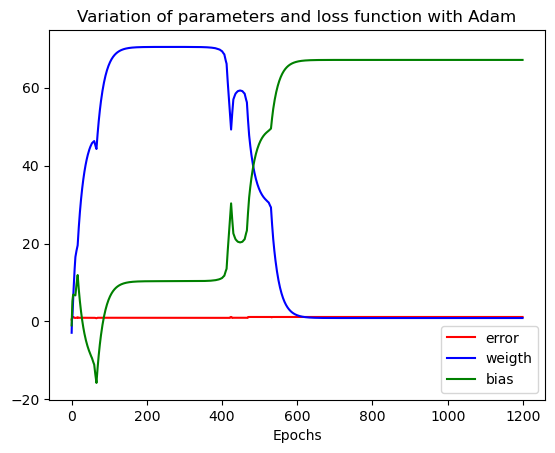

In [31]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Adam")
plt.xlabel("Epochs")
plt.show()


Avec la variante **Adam**, on constate que l'erreur converge des la premiere iteration tandis que les parametres n'ont pas vraiment une direction précise jusqu'au elntour de l'epoques 300 ou elles semblent avoir trouvé une stabilité pendant environ 100 epoques avec de reprendre de nouvelles formes a nouveaux jusqu'a la 600 ieme epoques ou elles semblent cette fois si avoir trouvé un point de convergence.

### <u>CONCLUSION</u>

On peut conclure de part ces analyses que:
- Les parametres et la perte de **Momentum** et **NAG** atteignent la convergence assez rapidement et que la perte varie tres faiblemet. Par contre les parametres varient fortement pendant un certains nombres d'itérarions jusqu'a ce qu'ils trouvent un point de convergence.
- Les parametres de **GD** et **Mini Batch** varient tres peux mais leurs pertes varient significativement par rapport aux algorithmes precedent et la convergence est atteinte beaucoup plus lentement.
- Les parametres de **Adagrad**, **RMSprop** et **Adam** varient toujours donc semble ne jamais converger par contre la perte atteint la convergence tres rapidement. Parfois des les premieres itérations.

## <u>3-2- Configuration du traçage 3D</u>

**Pour le tracé 3D nous creons une grille de maillage de 256 valeurs equidistantes compris entre les minima et les maxima du poids w et du biais b pour le calcul de l'erreur pour de notre fonction sigmoide. Ensuite nous creons une poignée d'axe pour le tracé 3D. Pour le tracé 3D nous créons un graphique de surface pour afficher l'erreur en fonction du poids et du biais. Ensuite nous tracons le contour de l'erreur par rapport au poids et au biais sur la surface du dessus en specifiant l'axe Z. Nous definissons par les suite les etiquettes des axes ainsi que leurs limites et efin nous definissons un point de vue pour notre tracé. Pour la visualisation dynamique des iterations et de nos variables d'historiques de nos differents algorithmes, nous allons creer une animation qui mettra a jour les valeurs l'erreur en fonction de nos differents parametres.**

In [33]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d') # Correction ici
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75) # azim = -20
    ax.dist = 12  
    title = ax.set_title('Epoch 0')


In [35]:
def plot_animate_3d(i):
    i = int(i * (epochs / animation_frames))
    line1.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
    line1.set_3d_properties(sn.e_h[:i+1])
    line2.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
    line2.set_3d_properties(np.zeros(i+1) - 1)
    title.set_text('Epoch: {:d}, Error: {:.4f}'.format(i, sn.e_h[i]))
    return line1, line2, title

if plot_3d: 
    anim = animation.FuncAnimation(fig, func=plot_animate_3d, frames=animation_frames)
    rc('animation', html='jshtml')
    anim


## <u>3-3- Configuration du traçage 2D</u>

**Pour le tracage 2D, le principe de creation de la representation et de l'animation reste presque le meme que celui de 3D a la difference que les parametres et les elements graphiques sont defini pour une diemnsion a deux 2 axes.**

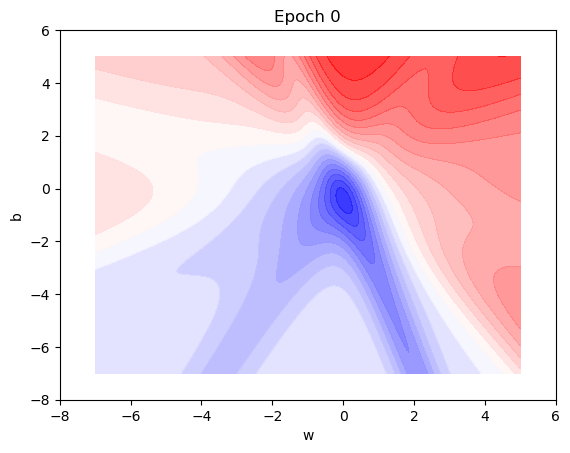

In [37]:
if plot_2d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig, ax = plt.subplots(dpi=100)  # Utiliser plt.subplots pour garder la référence à ax
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    title = ax.set_title('Epoch 0')
    cset = ax.contourf(WW, BB, Z, 25, alpha=0.8, cmap=cm.bwr)  # Utiliser ax.contourf pour correspondre à ax
    plt.savefig("temp.jpg", dpi=2000)
    plt.show()

def plot_animate_2d(i):
    i = int(i * (epochs / animation_frames))
    line.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
    title.set_text('Epoch: {:d}, Error: {:.4f}'.format(i, sn.e_h[i]))
    return line, title

if plot_2d: 
    i = 0
    line, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], color='black', marker='.')
    anim = animation.FuncAnimation(fig, func=plot_animate_2d, frames=animation_frames)
    rc('animation', html='jshtml')
    anim


# <u>4- Implementation des algorithmes de descente de gradient sur la fonction logistique</u> 

## <u>4-1- Descente de Gradient Vanillé</u> 

Le poids et le biais se mette a jour en prenant la direction opposé a celle du gradient de la fonction objective. Les regles de mise a jours des parametres sont les suivantes:

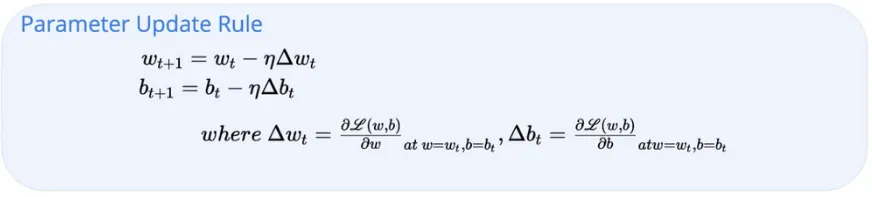

- Dans la descente de gradient vanillé, on itere sur un nombres d'epoques definit les etapes suivantes:
    - l'initialisation du poids et du biais a 0
    - On parcour simultanneement les tableaux X et Y pour calculer les gradients du poids et du biais
    - On met a jour la valeur du poids et du biais
    - On sauvegarde les resultats de l'execution precedente.
- Par la suite on defini:
    - les tableaux de donnees X et Y
    - on choisit l'algorithme **GD**
    - on initialise et on defini les limites du poids et du biais
    - on defini eta et le nombre d'epoques
    - on defini le nombre de frames pour l'animation
    - enfin on choisi le type de representation.
- Enfin on entraine SN sur nos donnees pour l'algorithme GD avec les parametres définit précédement et on affiche les graphiques

In [39]:
for i in range(epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw += sn.grad_w(x, y)
        db += sn.grad_b(x, y)
    sn.w -= eta * dw / X.shape[0]
    sn.b -= eta * db / X.shape[0]
    sn.append_log()
            

In [41]:
X = np.asarray([0.5, 2.5])
Y = np.asarray([0.2, 0.9])

algo = 'GD'
w_init = -2
b_init = -2
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 1000
eta = 1

animation_frames = 20
plot_2d = True
plot_3d = True


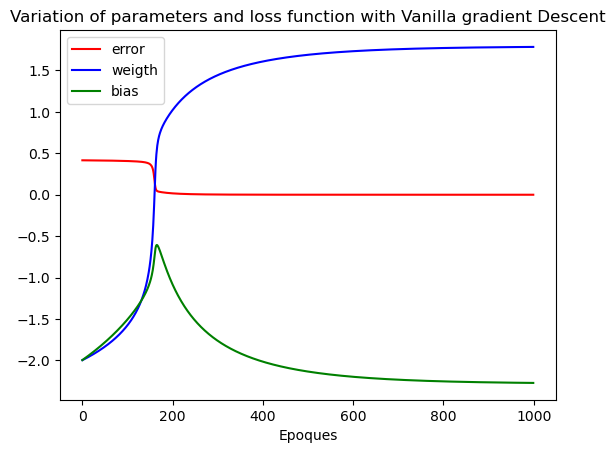

In [43]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Vanilla gradient Descent")
plt.xlabel("Epoques")
plt.show()


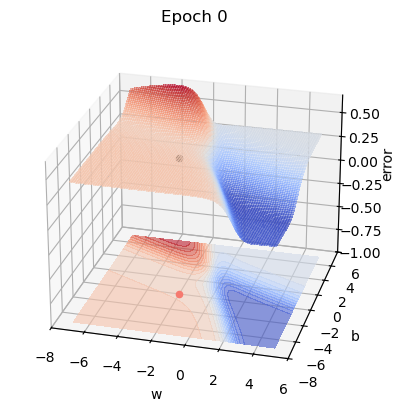

In [45]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


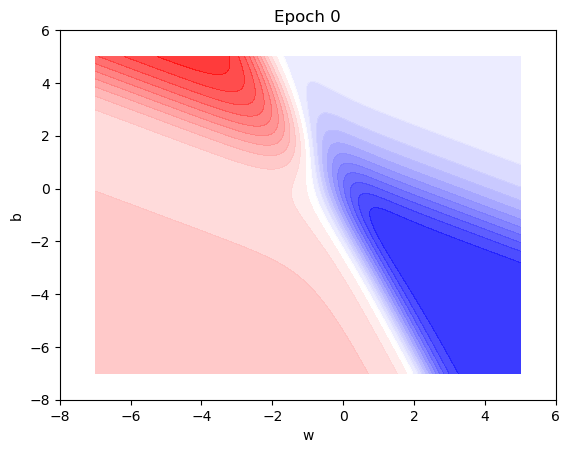

C:\Users\Christian\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [47]:
if plot_2d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig, ax = plt.subplots(dpi=100)  # Utiliser plt.subplots pour garder la référence à ax
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    title = ax.set_title('Epoch 0')
    cset = ax.contourf(WW, BB, Z, 25, alpha=0.8, cmap=cm.bwr)  # Utiliser ax.contourf pour correspondre à ax
    plt.savefig("temp.jpg", dpi=2000)
    plt.show()

def plot_animate_2d(i):
    i = int(i * (epochs / animation_frames))
    line.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
    title.set_text('Epoch: {:d}, Error: {:.4f}'.format(i, sn.e_h[i]))
    return line, title

if plot_2d: 
    i = 0
    line, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], color='black', marker='.')
    anim = animation.FuncAnimation(fig, func=plot_animate_2d, frames=animation_frames)
    rc('animation', html='jshtml')
    anim


Le graphique suivant montre que:
- L'**erreur** varie entre presque 0,4 et 0,0 mais la convergence est atteinte vers la 200 ieme itération.
- Le **poids** passe de -2 a plus de 1,5 et atteint la convergence apres 400 itérations
- Le **biais** quant a lui va croitre de -2 a presque -0,5 entre la premiere et la 200 ieme itération ensuite va decroitre et atteindre la convergence apres 400 iterations.

In [48]:
def plot_animate_3d(i):
    i = int(i * (epochs / animation_frames))
    line1.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
    line1.set_3d_properties(sn.e_h[:i+1])
    line2.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
    line2.set_3d_properties(np.zeros(i+1) - 1)
    title.set_text('Epoch: {:d}, Error: {:.4f}'.format(i, sn.e_h[i]))
    return line1, line2, title

if plot_3d: 
    anim = animation.FuncAnimation(fig, func=plot_animate_3d, frames=animation_frames)
    rc('animation', html='jshtml')
    anim


De facon dynamique au fur et à mesure que l’animation évolue, nous pouvons retrouver les informations sur l'**epoques** la valeur de l’**erreur** ainsi que le **poids** et le **bais** correspondante à cette époque.

<img src="https://miro.medium.com/v2/resize:fit:828/1*mINB8h-ifWiQgfWY42b_YA.gif"></img>

## <u>4-2 Descente de Gradient Basée sur Momentum</u> 

Dans l'algorithme de descente de gradient avec Momentum, nous nous deplacons en fesant la moyenne cumulative décroissante exponentielle des gradients précédents et du gradient actuel. En d'autre terme, l'algorithme de descente de gradient avec momentum combine le gradient actuel avec une moyenne pondérée des gradients précédents pour déterminer les mises à jour des poids. Nous faisons une moyenne des gradients passés, mais en leur donnant de moins en moins d'importance (poids) au fil du temps. Le gradient actuel a plus de poids, mais les gradients passés influencent toujours la direction de la mise à jour. Nous gardons une trace des valeurs des gradients precedents. La variable gamma indique la quantité de mouvement que nous devons transmettre à l’algorithme. Les variables et seront utilisées pour calculer le mouvement du dégradé en fonction de l’historique ainsi que du dégradé actuel. À la fin de chaque époque, nous appelons la fonction pour stocker l’historique des paramètres et les valeurs de la fonction de perte.

Les regles de mises a jour sont les suivantes:
$$ v_t = \gamma \cdot v_{t-1} + \eta \nabla w_{t} $$

$$ w_{t+1} = w_t - v_t $$

$$ b_{t+1} = b_t - v_t $$
avec : 

- 𝑣: la vitesse (velocity), c'est-à-dire la somme pondérée des gradients.
- 𝛾: le facteur de momentum compris entre 0 et 1, qui contrôle l'importance des gradients passés.
- 𝜂: le taux d'apprentissage.

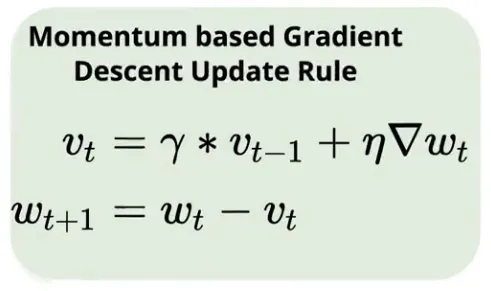

Dans la **descente de gradient avec Momentum** on repete les étapes suivantes:
- On initialise les moyenne cumulative du poids **v_w** et du biais **v_b** a 0
- on itere sur un nombres d'epoques definit les etapes suivantes:
    - l'initialisation du poids et du biais a 0
    - On parcour simultanneement les tableaux X et Y pour calculer les gradients du poids et du biais
    - On met a jour **v_w** et **v_b**
    - On met a jour la valeur du poids et du biais
    - On sauvegarde les resultats de l'execution precedente.
- Par la suite on defini:
    - les tableaux de donnees X et Y
    - on choisit l'algorithme **Momentum**
    - on initialise et on defini les limites du poids et du biais
    - on defini eta et les parametres tels que le nombre d'**epoques (1000)**, la **taille des mini lot**, **gamma** et **eta**
    - on defini le nombre de frames pour l'animation
    - enfin on choisi le type de representation.
- Enfin on entraine SN sur nos donnees pour l'algorithme GD avec Momentum avec les parametres définit précédement et on affiche les graphiques.

In [51]:
v_w, v_b = 0, 0
for i in range(epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw += sn.grad_w(x, y)
        db += sn.grad_b(x, y)
    v_w = gamma * v_w + eta * dw 
    v_b = gamma * v_b + eta * db
    sn.w = sn.w - v_w
    sn.b = sn.b - v_b
    sn.append_log()
    

In [53]:
X = np.asarray([0.5, 2.5])
Y = np.asarray([0.2, 0.9])
algo = 'Momentum'
w_init = -2
b_init = -2
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 1000
mini_batch_size = 6
gamma = 0.9
eta = 1
animation_frames = 20
plot_2d = True
plot_3d = True


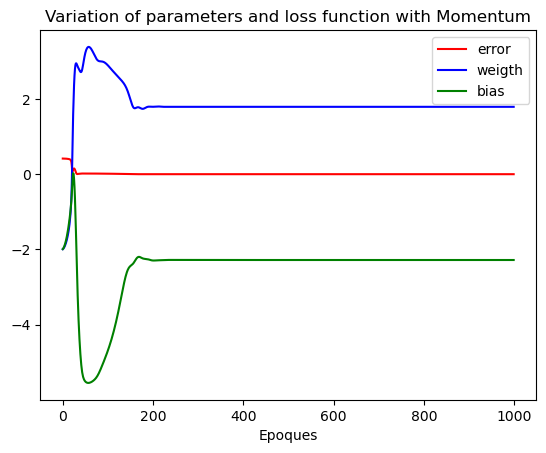

In [55]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Momentum")
plt.xlabel("Epoques")
plt.show()


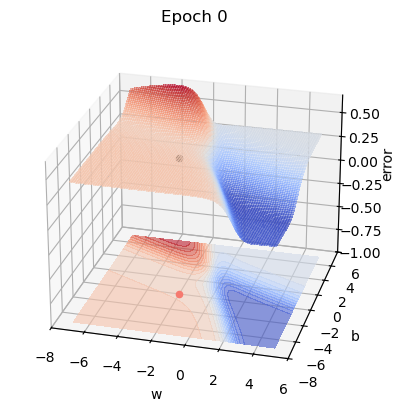

In [57]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


Le graphique précédent montre **la variation de l'erreur du poids et du biais** apres l'execution de 1000 iterations defini. On peut constater que:
- L'**erreur** se stabilise tres vite autour de la 50eme itération et qu'il varie tres peu.
- Le **poids** et le **biais** oscillent beaucoup entre la premiere et la 200eme iteration avant de se stabiliser

## <u>4-3- Descente de Gradient Accéléré de Nesterov (NAG)</u> 

La descente de gradient accélérée de Nesterov introduit une notion de **regard vers l'avant** en effectuant les mises à jour des paramètres en fonction des gradients évalués à des positions légèrement avancées. On cherche a voir si nous sommes proche du des minima ou non avant de faire un autre pas pour eviter le **dépassement**. Pour effectuer la descente de gradient avec NAG pour la mise a jour des parametres nous suivrons les etapes suivantes:
1. **Estimation de la position future** :
   $$ \tilde{w} = w - \gamma \cdot v_w $$
   $$ \tilde{b} = b - \gamma \cdot v_b $$

2. **Calcul du gradient à cette position future** :
   Utiliser $\tilde{w}$ et $\tilde{b}$ pour calculer le gradient.

3. **Mettre à jour la vitesse (velocity)** :
   $$ v_w = \gamma \cdot v_w + \eta \cdot \nabla f(\tilde{w}) $$
   $$ v_b = \gamma \cdot v_b + \eta \cdot \nabla f(\tilde{b}) $$
Nous pouvons la généraliser comme suit:

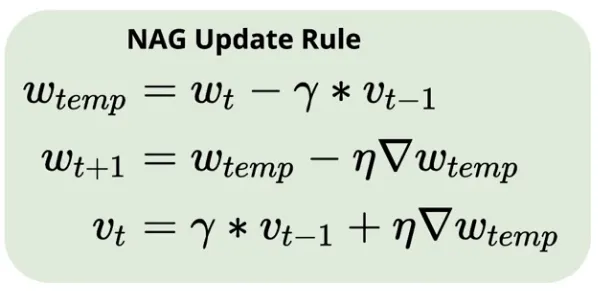

Dans la **descente de gradient avec NAG** on repete les étapes suivantes:
- On initialise les moyenne cumulative du poids **v_w** et du biais **v_b** a 0
- on itere sur un nombres d'epoques definit les etapes suivantes:
    - l'initialisation du poids et du biais a 0
    - On affecte a **v_w** et **v_b** le produits de **gamma** par **v_w** et **v_b** respectivement 
    - On parcour simultanneement les tableaux X et Y pour calculer les gradients du poids et du biais
    - On met a jour **v_w** et **v_b** en fesant la somme les valeurs de **v_w** et **v_b** par le produits de **eta** et du gradient du poids et biais respectivement
    - On met a jour la valeur du poids et du biais
    - On sauvegarde les resultats de l'execution precedente.
- Par la suite on defini:
    - les tableaux de donnees X et Y
    - on choisit l'algorithme **NAG**
    - on initialise et on defini les limites du poids et du biais
    - on defini eta et les parametres tels que le nombre d'**epoques (1000)**, la **taille des mini lot**, **gamma** et **eta**
    - on defini le nombre de frames pour l'animation
    - enfin on choisi le type de representation.
- Enfin on entraine SN sur nos donnees pour l'algorithme GD avec Momentum avec les parametres définit précédement et on affiche les graphiques.

In [59]:
v_w, v_b = 0, 0
for i in range(epochs):
    dw, db = 0, 0
    v_w = gamma * v_w
    v_b = gamma * v_b
    for x, y in zip(X, Y):
        dw += sn.grad_w(x, y, sn.w - v_w, sn.b - v_b)
        db += sn.grad_b(x, y, sn.w - v_w, sn.b - v_b)
    v_w = v_w + eta * dw
    v_b = v_b + eta * db
    sn.w = sn.w - v_w
    sn.b = sn.b - v_b
    sn.append_log()


In [61]:
X = np.asarray([0.5, 2.5])
Y = np.asarray([0.2, 0.9])
algo = 'NAG'
w_init = -2
b_init = -2
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 1000
mini_batch_size = 6
gamma = 0.9
eta = 1
animation_frames = 20
plot_2d = True
plot_3d = True


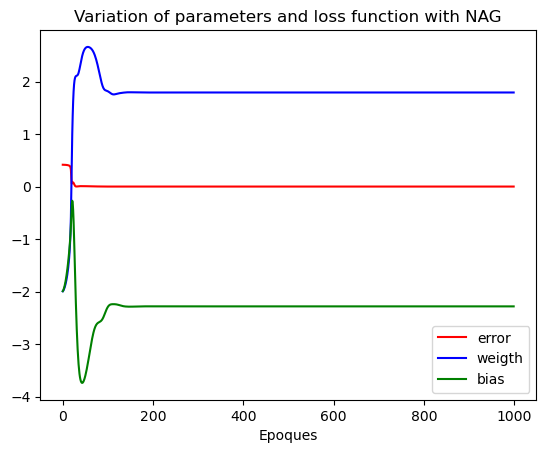

In [63]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with NAG")
plt.xlabel("Epoques")
plt.show()


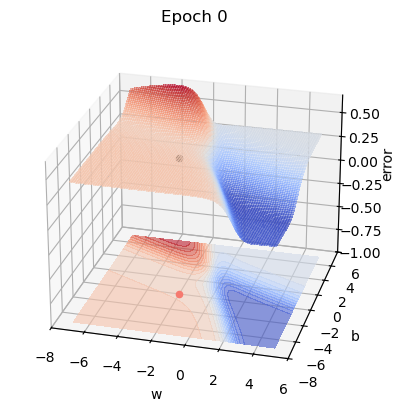

In [65]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


***Dans la descente de gradient avec NAG, les variations de l'erreur, du poids et du biais sont presque similaire a celle de Momentum a la différence que NAG oscille faiblement par rapport a Momentum car NAG évite les depassements. De plus les parametres pour NAG converge plus rapidement qu'avec Momentum.***

## <u>4-4- Mini Lots et Descent Gradient Stochastique </u> 

Le principe de cette algorithme repose sur la divisions de l’ensemble des données en un certain nombre de sous-ensembles. Pour chaque sous-ensemble, on calculez les dérivées de chacun des points présents dans le sous-ensemble et on met à jour les paramètres. Au lieu de calculer la dérivée pour des données entières par rapport à la fonction de perte, nous l’avons approximée à moins de points ou à une taille de lot plus petite. Dans la Descente de Gradient Stochastique **(SGD)**, le calcul du gradient et la mises a jour des poids est defini comme suit: $$ dw = \frac{\partial L}{\partial w} $$ $$ db = \frac{\partial L}{\partial b} $$
La mise à jour des poids et biais après chaque iteration de lot est défini comme suit: $$ w = w - \eta \cdot dw $$ $$ b = b - \eta \cdot db $$
Lorsqu'on inclu les Mini-Lots (Mini-batch) dans l' algorithme de descente, la division des données en mini-lots s'effectue comme suit: si nous avons 100 exemples de données et un mini-lot de taille 10, nous aurons 10 mini-lots. Le calcul du gradient pour chaque mini-lot est donné par : $$ dw = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial w_i} $$ $$ db = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L}{\partial b_i} $$
Et la Mise à jour des poids et biais après chaque mini-lot est donné par: $$ w = w - \eta \cdot dw $$ $$ b = b - \eta \cdot db $$ ou **𝑚** est la taille du mini-lot.

Pour implementer la descente avec Mini Lot, nous definissons la boucle dans laquelle nous allons iterer notre algorithme en executant les etapes suivantes:
- Initialisation du gradient du poids, du biais et du nombre de d'exemple de données qu'on a traité dans un mini lot **point_seen** a 0
- On parcours simultanéement X et Y pour:
    - Calculer les gradients du poids et du biais
    - incrementer le nombre d'exemple
    - Mettre a jour le poids et le biais 
    - Sauvegarder une trace de l'historique
    - initialiser le poids et le biais pour la prochaine iteration
- Par la suite on defini:
    - les tableaux de donnees X et Y
    - on choisit l'algorithme **MiniBatch**
    - on initialise et on defini les limites du poids et du biais
    - on defini eta et les parametres tels que le nombre d'**epoques (1000)**, la **taille des mini lot**, **gamma** et **eta**
    - on defini le nombre de frames pour l'animation
    - enfin on choisi le type de representation.
- Enfin on entraine SN sur nos donnees pour l'algorithme GD avec Momentum avec les parametres définit précédement et on affiche les graphiques.


In [67]:
for i in range(epochs):
    dw, db = 0, 0
    points_seen = 0
    for x, y in zip(X, Y):
        dw += sn.grad_w(x, y)
        db += sn.grad_b(x, y)
        points_seen += 1
        if points_seen % mini_batch_size == 0:
            sn.w -= eta * dw / mini_batch_size
            sn.b -= eta * db / mini_batch_size
            sn.append_log()
            dw, db = 0, 0
        

In [69]:
X = np.asarray([0.5, 2.5])
Y = np.asarray([0.2, 0.9])
algo = 'MiniBatch'
w_init = -2
b_init = -2
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 1000
mini_batch_size = 1
gamma = 0.9
eta = 1
animation_frames = 20
plot_2d = True
plot_3d = True


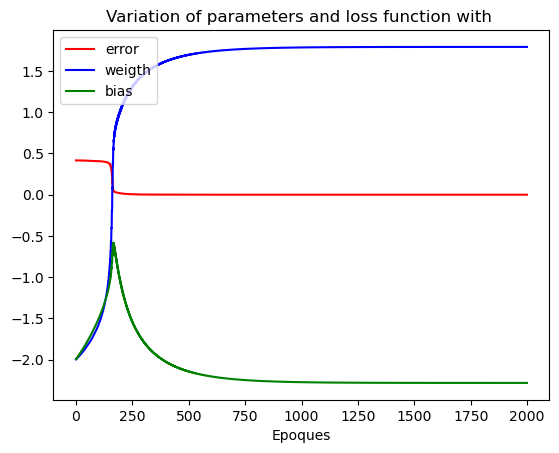

In [71]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with ")
plt.xlabel("Epoques")
plt.show()


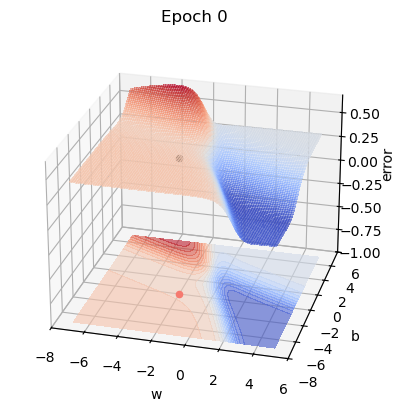

In [73]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


L'erreur, le poids et la perte ici varient comme dans la Descente de Gradient Vanillé parceque nous avons tres peu de données. Lorsqu'on decoupe les données en petit lot 1 ou 2, on est rammené a la Descente du Gradient vanillé.

## <u>4-5- Adagrad Gradient Descent</u> 

L'idée derriere **Adagrad** est d'utiliser un taux d'apprentissage qui s'adapte aux parametres et au donnees a chaque étape dans le but de rendre la descente intelligente a la place d'utiliser un taux d'apprentissage fixe. La regle de mises a jour des parametres est la suivante:
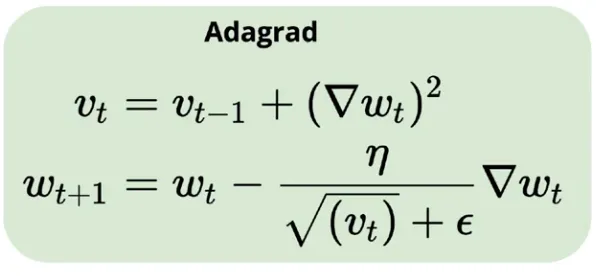

Pour implementer la descente avec Adagrad, nous executerons les etapes suivantes:
- Initialisation de epsilon pour eviter la division par 0
- Initialisation des gradients accumulés du poids v_w et du biais v_b a 0
- On itere sur le nombre d'epoque defini les instructions suivantes
    - Initialisation du gradient du poids et du biais a 0
    - parcours simultanée de X et Y en:
        - Calculer les gradients du poids et du biais
    - On met a jour la velocité des parametres en elevant le gradient du parametres au carré
    - Mettre a jour le poids et le biais en utilisant la regle de mises a jour pour **Adagrad**
    - Sauvegarder une trace de l'historique
- Par la suite on defini:
    - les tableaux de donnees X et Y
    - on choisit l'algorithme **Adagrad**
    - on initialise et on defini les limites du poids et du biais
    - on defini eta et les parametres tels que le nombre d'**epoques (1000)**, la **taille des mini lot**, **gamma** et **eta**
    - on defini le nombre de frames pour l'animation
    - enfin on choisi le type de representation.
- Enfin on entraine SN sur nos donnees pour l'algorithme GD avec Momentum avec les parametres définit précédement et on affiche les graphiques.


In [75]:
eps=1e-8
v_w, v_b = 0, 0
for i in range(epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw += sn.grad_w(x, y)
        db += sn.grad_b(x, y)
    v_w += dw**2
    v_b += db**2
    sn.w -= (eta / np.sqrt(v_w) + eps) * dw
    sn.b -= (eta / np.sqrt(v_b) + eps) * db
    sn.append_log()
    

In [77]:
X = np.asarray([0.5, 2.5])
Y = np.asarray([0.2, 0.9])
algo = 'Adagrad'
w_init = -2
b_init = -2
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 1000
mini_batch_size = 6
gamma = 0.9
eta = 1
animation_frames = 20
plot_2d = True
plot_3d = True


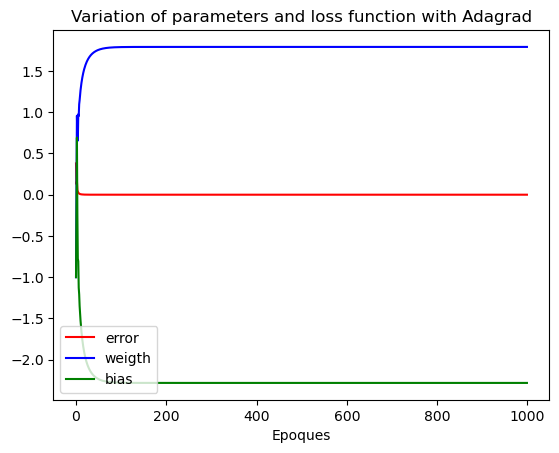

In [79]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with Adagrad")
plt.xlabel("Epoques")
plt.show()


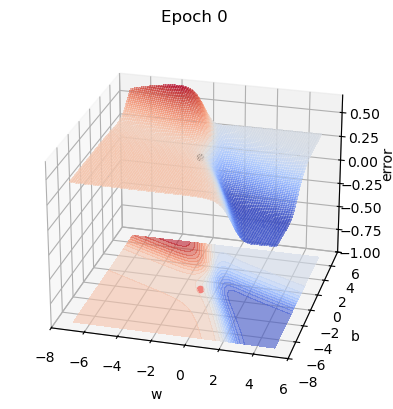

In [81]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


**Avec Adagrad on constate que la convergence des parametres et de l'erreur est atteinte assez rapidement ce qui a été rendu possible grace a la mise a jour intelligente des poids et du biais. En effet on se rend compte qu'autour de la 50ieme iteration, la convergence des parametres semble deja effective tandis que l'erreur atteint la convergence quelques etapes avant.**

## <u>4-7- Descente du Gradient avec RMSprop</u> 

La **RMSprop** est une méthode qui ajuste dynamiquement le taux d'apprentissage pour chaque paramètre en utilisant une moyenne mobile des gradients carrés pour stabiliser l'apprentissage en évitant de trop grandes mises à jour des poids. La regles de mises a jour est la suivante:

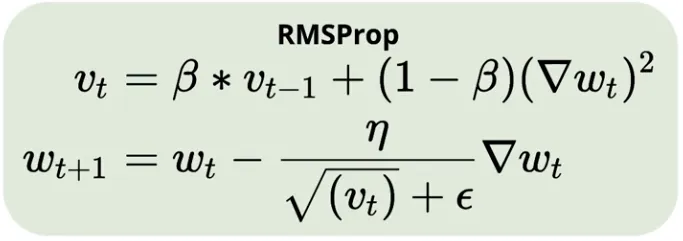

Pour implementer la descente avec RMSprop, nous executerons les etapes suivantes:
- Initialisation de beta
- Initialisation des gradients accumulés du poids v_w et du biais v_b a 0
- On itere sur le nombre d'epoque defini les instructions suivantes:
    - Initialisation du gradient du poids et du biais a 0
    - parcours simultanée de X et Y en:
        - Calculer les gradients du poids et du biais
    - On met a jour la velocité des parametres grace a la formule: $$ \beta \cdot v_w + (1 - \beta) \cdot dw^2 $$
    - Mettre a jour le poids et le biais en utilisant la regle de mises a jour pour **RMSprop**
    - Sauvegarder une trace de l'historique
- Par la suite on defini:
    - les tableaux de donnees X et Y
    - on choisit l'algorithme **RMSprop**
    - on initialise et on defini les limites du poids et du biais
    - on defini eta et les parametres tels que le nombre d'**epoques (1000)**, la **taille des mini lot**, **gamma** et **eta**
    - on defini le nombre de frames pour l'animation
    - enfin on choisi le type de representation.
- Enfin on entraine SN sur nos donnees pour l'algorithme GD avec Momentum avec les parametres définit précédement et on affiche les graphiques.


In [83]:
beta=0.9
v_w, v_b = 0, 0
for i in range(epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw += sn.grad_w(x, y)
        db += sn.grad_b(x, y)
    v_w = beta * v_w + (1 - beta) * dw**2
    v_b = beta * v_b + (1 - beta) * db**2
    sn.w -= (eta / np.sqrt(v_w) + eps) * dw
    sn.b -= (eta / np.sqrt(v_b) + eps) * db
    sn.append_log()
    

In [85]:
X = np.asarray([0.5, 2.5])
Y = np.asarray([0.2, 0.9])
algo = 'RMSprop'
w_init = -2
b_init = -2
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 1000
mini_batch_size = 6
gamma = 0.9
eta = 1
animation_frames = 20
plot_2d = True
plot_3d = True


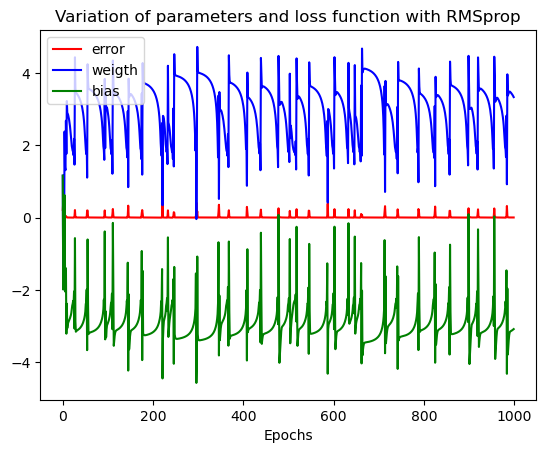

In [87]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with RMSprop")
plt.xlabel("Epochs")
plt.show()


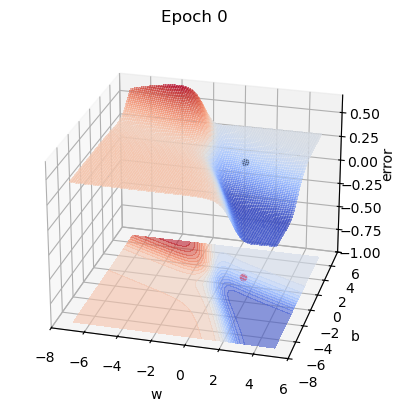

In [89]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


**Avec RMSprop, on constate que les parametres n'atteignent jamais la convergence et realise donc toujours des oscillations mais que la perte est miniamle des le depart. On observe egalement une faible oscillantion de la perte durant tout le processus et que la valeur de la perte est maximale lorsque la valeur du poids est minimal.**

## <u>4-7-Adam Gradient Descent</u> 

La variante **Adam** combine les avantages de deux autres extensions de descente de gradient : **RMSProp et Momentum**. Elle utilise des moyennes mobiles des gradients et des carrés de gradients pour ajuster dynamiquement le taux d'apprentissage pour chaque paramètre. En utilisant les équations suivante pour **𝑚_𝑡 et 𝑣_𝑡**:
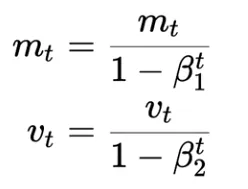 

elle met a jour les parametres avec les regles suivantes:

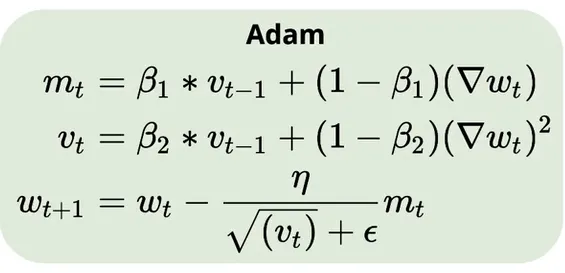

ou **𝑚_𝑡** represente la Moyenne mobile des gradients et **𝑣_𝑡** Moyenne mobile des gradients carrés.

In [91]:
beta1=0.9
beta2=0.9
v_w, v_b = 0, 0
m_w, m_b = 0, 0
num_updates = 0
for i in range(epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw = sn.grad_w(x, y)
        db = sn.grad_b(x, y)
        num_updates += 1
        m_w = beta1 * m_w + (1-beta1) * dw
        m_b = beta1 * m_b + (1-beta1) * db
        v_w = beta2 * v_w + (1-beta2) * dw**2
        v_b = beta2 * v_b + (1-beta2) * db**2
        m_w_c = m_w / (1 - np.power(beta1, num_updates))
        m_b_c = m_b / (1 - np.power(beta1, num_updates))
        v_w_c = v_w / (1 - np.power(beta2, num_updates))
        v_b_c = v_b / (1 - np.power(beta2, num_updates))
        sn.w -= (eta / np.sqrt(v_w_c) + eps) * m_w_c
        sn.b -= (eta / np.sqrt(v_b_c) + eps) * m_b_c
        sn.append_log()


In [93]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])
algo = 'Adam'
w_init = -6
b_init = 4.0
w_min = -7
w_max = 5
b_min = -7
b_max = 5
epochs = 200
gamma = 0.9
eta = 0.5
eps = 1e-8
animation_frames = 20
plot_2d = True
plot_3d = False


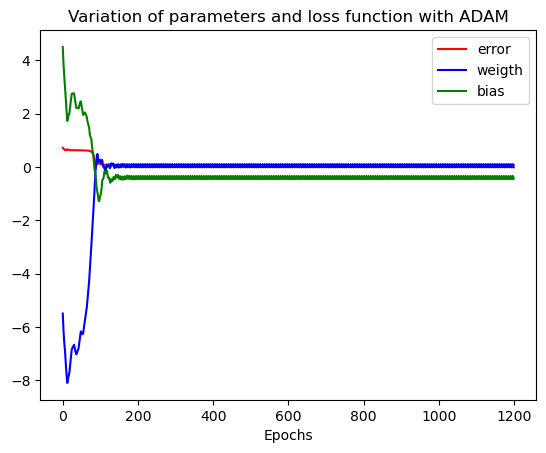

In [95]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta, gamma=gamma, mini_batch_size=mini_batch_size)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.legend(('error', 'weigth', 'bias'))
plt.title("Variation of parameters and loss function with ADAM")
plt.xlabel("Epochs")
plt.show()


In [97]:
if plot_3d: 
    W = np.linspace(w_min, w_max, 256)
    b = np.linspace(b_min, b_max, 256)
    WW, BB = np.meshgrid(W, b)
    Z = sn.error(X, Y, WW, BB)

    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
    ax.set_xlabel('w')
    ax.set_xlim(w_min - 1, w_max + 1)
    ax.set_ylabel('b')
    ax.set_ylim(b_min - 1, b_max + 1)
    ax.set_zlabel('error')
    ax.set_zlim(-1, np.max(Z))
    ax.view_init(elev=25, azim=-75)
    ax.dist = 12  
    # Ajouter un point noir pour la perte de la première itération
    w_first, b_first = sn.w_h[0], sn.b_h[0]
    loss_first = sn.e_h[0]
    ax.scatter(w_first, b_first, loss_first, color='black', s=20)
    ax.text(w_first, b_first, loss_first, f'', color='black', fontsize=10)
    # Projeter ce point sur les plans 2D
    ax.scatter(w_first, b_first, -1, color='red', s=20, marker='o')
    title = ax.set_title('Epoch 0')
    plt.show()


**Avec Adam, on constate que les parametres varient beaucoup jusqu'autour de la 200ieme iteration avant de trouver un range tres etroit dans lequel ils vont osciller. La perte par contre semble avoir atteint le point de convergence un peu avant la 200 ieme itération.**

<img src="https://miro.medium.com/v2/resize:fit:828/1*g0LrZM3dxCFrOGR_N1Q5kA.gif">